In [1]:
ENV["PYTHON"] = ""

""

In [2]:
d = 1.5* 10^8
vel = collect(300:100:3500)
tiempo = d./vel
tiempoh = tiempo/3600
tiempod = tiempoh/24
respuesta = [vel tiempoh tiempod]

33x3 Array{Float64,2}:
  300.0  138.889   5.78704 
  400.0  104.167   4.34028 
  500.0   83.3333  3.47222 
  600.0   69.4444  2.89352 
  700.0   59.5238  2.48016 
  800.0   52.0833  2.17014 
  900.0   46.2963  1.92901 
 1000.0   41.6667  1.73611 
 1100.0   37.8788  1.57828 
 1200.0   34.7222  1.44676 
 1300.0   32.0513  1.33547 
 1400.0   29.7619  1.24008 
 1500.0   27.7778  1.15741 
    ⋮                      
 2400.0   17.3611  0.72338 
 2500.0   16.6667  0.694444
 2600.0   16.0256  0.667735
 2700.0   15.4321  0.643004
 2800.0   14.881   0.62004 
 2900.0   14.3678  0.598659
 3000.0   13.8889  0.578704
 3100.0   13.4409  0.560036
 3200.0   13.0208  0.542535
 3300.0   12.6263  0.526094
 3400.0   12.2549  0.510621
 3500.0   11.9048  0.496032

# El viento solar durante eventos con Dst > 70 nT comparado con el que se observa durante grandes tormentas.
Los 5 eventos de Bmas > 70 nT son los siguientes:

no de evento año mes día Dstmax Dstmin 
- 35  2012  6  16 95   -71
- 5  1961  7  13  92  -13
- 20  1989  5  23  81   -82
- 4  1959  7  11  77   NaN
- 18  1982  5  26  70   NaN

Y la tormenta contra la que vamos a comparar es la del 20 de noviembre de 2003. De acuerdo con Gopalswamy, Yashiro, Michalek, Xie, Lepping y Howard (2004): 

The largest geomagnetic storm of solar cycle 23 occurred on 2003 November 20 with a 
Dst index of -472 nT, due to a coronal mass ejection (CME) from active region 0501. The 
CME near the Sun had a sky-plane speed of
 ~1660 km/s, but the associated magnetic 
cloud (MC) arrived with a speed of 
only 730 km/s.  The MC at 1 AU (ACE 
Observations) had a high magnetic field  (~56 nT) and high inclination to the ecliptic 
plane. The southward component of the 
MC’s magnetic field was made up almost 
entirely of its axial field because of its east-south-west 
(ESW) chirality.  We suggest that 
the southward pointing strong axial field of the MC reconnected with
Earth’s front-side magnetic field,  resulting in the largest storm of the solar cycle 23. 
 
 Para cada uno de ellos buscaremos la información correspondiente en el catálogo de CMES y obtendremos los dat del viento solar de la página de omniweb:
 https://omniweb.gsfc.nasa.gov/
 
Y trataremos de contestar las preguntas:
¿Hay diferencias significativas en el comportamiento de estos eventos con el de la tormenta?
¿Se pueden señalar los cambios en los parámetros del viento solar responsables por la ocurrencia de estos eventos?
¿La magnetosfera terrestre juega algún papel?
 

In [7]:
using DataFrames, DataArrays

In [16]:
matriz = [
    35 2012 6 16 95 -71;
    5 1961 7 13 92 -13;
    20 1989 5 23 81 -82;
    4 1959 7 11 77 NaN;
    18 1982 5 26 70 NaN;
]
titulos = ["numero", "año", "mes", "día", "Bmax", "Bmin"]
df = DataFrame(A = :titulos, B = :matriz)

,A,B
1,titulos,matriz


## Primer ejemplo
Evento del 16 de junio de 2012

In [8]:
vs = readdlm("omni2_14800.lst")

720x11 Array{Float64,2}:
 2012.0  153.0   0.0   5.1  -3.7   2.9  -1.7   13718.0   8.4  358.0   27.0
 2012.0  153.0   1.0   5.0  -3.9   1.7  -2.5   12482.0   8.4  355.0   23.0
 2012.0  153.0   2.0   5.2  -4.5   0.9  -2.5   10074.0   7.0  354.0   19.0
 2012.0  153.0   3.0   4.8  -2.8  -2.3  -1.5   15801.0   7.9  364.0   18.0
 2012.0  153.0   4.0   5.3   1.0  -5.0   1.4   12985.0   5.6  366.0   17.0
 2012.0  153.0   5.0   5.7   1.9  -4.8   2.5    9368.0   3.8  361.0   15.0
 2012.0  153.0   6.0   5.8   2.3  -3.9   3.5    9684.0   4.2  357.0   18.0
 2012.0  153.0   7.0   6.0   2.0  -3.9   4.0    9549.0   3.4  358.0   19.0
 2012.0  153.0   8.0   6.1   2.1  -3.0   4.8   11203.0   3.0  353.0   19.0
 2012.0  153.0   9.0   6.2   2.0  -3.1   5.0   11891.0   2.8  350.0   19.0
 2012.0  153.0  10.0   6.2   1.6  -1.6   5.7   14798.0   3.3  354.0   24.0
 2012.0  153.0  11.0   5.8   1.3  -1.0   5.5   21869.0   5.3  363.0   29.0
 2012.0  153.0  12.0   5.0   1.5  -2.4   2.7   28406.0   7.8  363.0   24.0


In [10]:
dfvs = DataFrame(vs)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
1,2012.0,153.0,0.0,5.1,-3.7,2.9,-1.7,13718.0,8.4,358.0,27.0
2,2012.0,153.0,1.0,5.0,-3.9,1.7,-2.5,12482.0,8.4,355.0,23.0
3,2012.0,153.0,2.0,5.2,-4.5,0.9,-2.5,10074.0,7.0,354.0,19.0
4,2012.0,153.0,3.0,4.8,-2.8,-2.3,-1.5,15801.0,7.9,364.0,18.0
5,2012.0,153.0,4.0,5.3,1.0,-5.0,1.4,12985.0,5.6,366.0,17.0
6,2012.0,153.0,5.0,5.7,1.9,-4.8,2.5,9368.0,3.8,361.0,15.0
7,2012.0,153.0,6.0,5.8,2.3,-3.9,3.5,9684.0,4.2,357.0,18.0
8,2012.0,153.0,7.0,6.0,2.0,-3.9,4.0,9549.0,3.4,358.0,19.0
9,2012.0,153.0,8.0,6.1,2.1,-3.0,4.8,11203.0,3.0,353.0,19.0
10,2012.0,153.0,9.0,6.2,2.0,-3.1,5.0,11891.0,2.8,350.0,19.0


In [11]:
size(dfvs)

(720,11)

In [22]:
matricita = [dfvs[:,5:7] dfvs[:,10] dfvs[:,11]]

,x5,x6,x7,x1,x1_1
1,-3.7,2.9,-1.7,358.0,27.0
2,-3.9,1.7,-2.5,355.0,23.0
3,-4.5,0.9,-2.5,354.0,19.0
4,-2.8,-2.3,-1.5,364.0,18.0
5,1.0,-5.0,1.4,366.0,17.0
6,1.9,-4.8,2.5,361.0,15.0
7,2.3,-3.9,3.5,357.0,18.0
8,2.0,-3.9,4.0,358.0,19.0
9,2.1,-3.0,4.8,353.0,19.0
10,2.0,-3.1,5.0,350.0,19.0


In [50]:
tiempo = collect(1/24:1/24:30)

720-element Array{Float64,1}:
  0.0416667
  0.0833333
  0.125    
  0.166667 
  0.208333 
  0.25     
  0.291667 
  0.333333 
  0.375    
  0.416667 
  0.458333 
  0.5      
  0.541667 
  ⋮        
 29.5417   
 29.5833   
 29.625    
 29.6667   
 29.7083   
 29.75     
 29.7917   
 29.8333   
 29.875    
 29.9167   
 29.9583   
 30.0      

In [26]:
plot(matricita, layout = (5,1), fill=(0,0.3,:blue), ylabel = etiqs, 
xlabel = equis, xticks = nothing)

MethodError: MethodError: `length` has no method matching length(::Void)

In [25]:
ENV["PYTHON"] = ""
using Plots, PlotRecipes, StatPlots
pyplot()
#etiqs = ["Bx" "By" "Bz" "Vel" "Dst"]
#equis = ["" "" "" "" "June2012"]
plot(matricita, layout = (5,1), fill=(0,0.3,:blue), ylabel = etiqs, 
xlabel = equis, xticks = nothing)
#xlabel!("June 2012")

MethodError: MethodError: `length` has no method matching length(::Void)


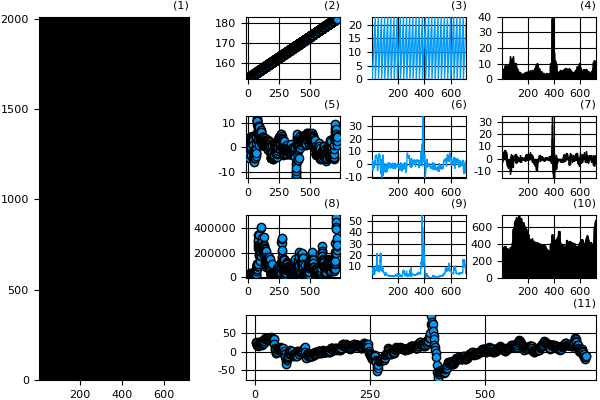

In [19]:
l = @layout [  a{0.3w} [grid(3,3)
                         b{0.2h} ]]
plot(
    vs,
    layout = l, legend = false, seriestype = [:bar :scatter :path],
    title = ["($i)" for i=1:11]', titleloc = :right, titlefont = font(8)
)

## Evento de referencia
### Tormenta geomagnética del 20 de noviembre de 2003

In [21]:
vsref = readdlm("omni2_486.txt")

603x11 Array{Float64,2}:
 2003.0  305.0   0.0  6.3  -3.4  -1.2  -0.6   17520.0  1.7  804.0  -69.0
 2003.0  305.0   1.0  4.0  -1.4  -1.8  -1.5   14982.0  1.5  801.0  -69.0
 2003.0  305.0   2.0  3.2  -1.4  -3.6  -3.2   12216.0  1.9  789.0  -61.0
 2003.0  305.0   3.0  4.3  -1.2  -2.3  -1.9   16531.0  1.6  770.0  -62.0
 2003.0  305.0   7.0  4.7  -1.5  -1.4  -0.6   10813.0  1.4  710.0  -48.0
 2003.0  305.0   8.0  4.7  -0.3  -1.7  -1.4    9101.0  1.5  699.0  -47.0
 2003.0  305.0  17.0  4.6  -1.5  -0.6  -0.2   12344.0  2.4  615.0  -31.0
 2003.0  305.0  18.0  1.8  -3.3  -2.7  -1.9   12960.0  2.2  638.0  -28.0
 2003.0  305.0  19.0  3.2  -2.3  -2.9  -2.4   11654.0  2.4  610.0  -32.0
 2003.0  305.0  20.0  3.2  -2.2  -3.1  -2.7   13096.0  2.6  610.0  -36.0
 2003.0  305.0  21.0  3.8  -3.0  -1.3  -0.8   13955.0  2.3  596.0  -33.0
 2003.0  305.0  22.0  3.0  -2.7  -2.6  -2.2   14915.0  2.2  595.0  -31.0
 2003.0  305.0  23.0  3.2  -2.3  -2.7  -2.3   19284.0  2.5  591.0  -37.0
    ⋮                     

In [24]:
matref = [vsref[:,5:7] vsref[:,10] vsref[:,11] ]

603x5 Array{Float64,2}:
 -3.4  -1.2  -0.6  804.0  -69.0
 -1.4  -1.8  -1.5  801.0  -69.0
 -1.4  -3.6  -3.2  789.0  -61.0
 -1.2  -2.3  -1.9  770.0  -62.0
 -1.5  -1.4  -0.6  710.0  -48.0
 -0.3  -1.7  -1.4  699.0  -47.0
 -1.5  -0.6  -0.2  615.0  -31.0
 -3.3  -2.7  -1.9  638.0  -28.0
 -2.3  -2.9  -2.4  610.0  -32.0
 -2.2  -3.1  -2.7  610.0  -36.0
 -3.0  -1.3  -0.8  596.0  -33.0
 -2.7  -2.6  -2.2  595.0  -31.0
 -2.3  -2.7  -2.3  591.0  -37.0
  ⋮                            
  1.4   5.1   4.4  467.0   14.0
  0.5  -0.7  -0.8  477.0    7.0
 -4.6  -5.8  -4.4  488.0   -3.0
 -5.7  -6.0  -4.7  488.0   -3.0
 -0.4  -2.2  -2.1  474.0   -9.0
 -3.9  -5.0  -4.5  484.0  -23.0
 -4.3  -5.4  -5.1  485.0  -30.0
 -3.5  -5.6  -5.5  489.0  -34.0
 -2.6  -3.3  -3.3  479.0  -39.0
 -4.2  -3.7  -3.8  475.0  -38.0
 -3.4  -3.0  -3.1  477.0  -33.0
 -4.9  -3.1  -3.3  482.0  -27.0


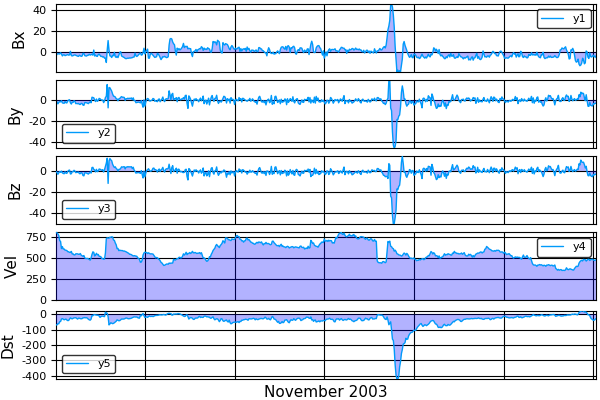

In [25]:
ENV["PYTHON"] = ""
using Plots, PlotRecipes, StatPlots
pyplot()
etiqsr = ["Bx" "By" "Bz" "Vel" "Dst"]
equisr = ["" "" "" "" "November 2003"]
plot(matref, layout = (5,1), fill=(0,0.3,:blue), ylabel = etiqsr, 
xlabel = equisr, xticks = nothing)

In [4]:
#Normalizados al valor extremo de cada parámetro
VSNorm = zeros(720,8)
for i = 1:8
    VSNorm[:,i] = vs_matrix[:,i]/maximum(abs(vs_matrix[:,i]))
end

In [5]:
VSNorm_inv = VSNorm[:,end:-1:1]

720x8 Array{Float64,2}:
  0.284211   0.487075  0.153565   …   0.0773333   -0.305785   0.127182
  0.242105   0.482993  0.153565       0.0453333   -0.322314   0.124688
  0.2        0.481633  0.127971       0.024       -0.371901   0.129676
  0.189474   0.495238  0.144424      -0.0613333   -0.231405   0.119701
  0.178947   0.497959  0.102377      -0.133333     0.0826446  0.13217 
  0.157895   0.491156  0.0694698  …  -0.128        0.157025   0.142145
  0.189474   0.485714  0.0767824     -0.104        0.190083   0.144638
  0.2        0.487075  0.0621572     -0.104        0.165289   0.149626
  0.2        0.480272  0.0548446     -0.08         0.173554   0.15212 
  0.2        0.47619   0.0511883     -0.0826667    0.165289   0.154613
  0.252632   0.481633  0.0603291  …  -0.0426667    0.132231   0.154613
  0.305263   0.493878  0.0968921     -0.0266667    0.107438   0.144638
  0.252632   0.493878  0.142596      -0.064        0.123967   0.124688
  ⋮                               ⋱   ⋮              

In [5]:
using PyPlot

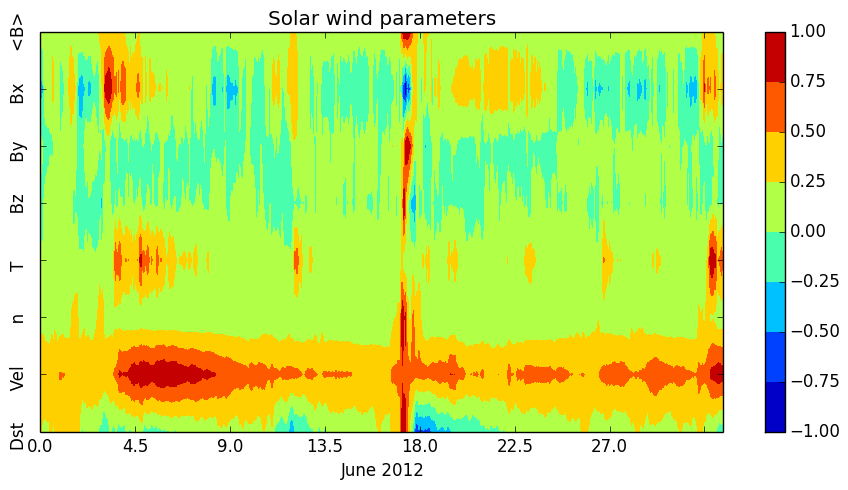

PyObject <matplotlib.colorbar.Colorbar instance at 0x31b25f248>

In [61]:
letreros =["Bx","By","Bz","n","T","V","Dst"]
fig = figure("pyplot_contourplot",figsize=(11,5))
#ax = fig[:add_subplot](2,1,1, projection = "3d") 
mapa = contourf(VSNorm_inv', labels = letreros)
title("Solar wind parameters")
ylabel("Dst      Vel        n        T         Bz      By       Bx      <B>")
xlabel("June 2012")
ax1 = gca()
#ax1[:ylabel]("labels=letreros")
ax1[:xaxis][:set_ticklabels](0:4.5:30)
ax1[:yaxis][:set_ticklabels]("","Bx","By","Bz","n","T","V", "Dst")
colorbar()
#setp(ax1[:get_yticklabels]("labels=letreros"))

In [14]:
VSNorm

720x8 Array{Float64,2}:
 0.127182  -0.305785    0.0773333   …  0.153565   0.487075   0.284211 
 0.124688  -0.322314    0.0453333      0.153565   0.482993   0.242105 
 0.129676  -0.371901    0.024          0.127971   0.481633   0.2      
 0.119701  -0.231405   -0.0613333      0.144424   0.495238   0.189474 
 0.13217    0.0826446  -0.133333       0.102377   0.497959   0.178947 
 0.142145   0.157025   -0.128       …  0.0694698  0.491156   0.157895 
 0.144638   0.190083   -0.104          0.0767824  0.485714   0.189474 
 0.149626   0.165289   -0.104          0.0621572  0.487075   0.2      
 0.15212    0.173554   -0.08           0.0548446  0.480272   0.2      
 0.154613   0.165289   -0.0826667      0.0511883  0.47619    0.2      
 0.154613   0.132231   -0.0426667   …  0.0603291  0.481633   0.252632 
 0.144638   0.107438   -0.0266667      0.0968921  0.493878   0.305263 
 0.124688   0.123967   -0.064          0.142596   0.493878   0.252632 
 ⋮                                  ⋱  ⋮             

In [18]:
?colorbar

search: colorbar





Add a colorbar to a plot.

Function signatures for the :mod:`~matplotlib.pyplot` interface; all
but the first are also method signatures for the
:meth:`~matplotlib.figure.Figure.colorbar` method::

  colorbar(**kwargs)
  colorbar(mappable, **kwargs)
  colorbar(mappable, cax=cax, **kwargs)
  colorbar(mappable, ax=ax, **kwargs)

arguments:

  *mappable*
    the :class:`~matplotlib.image.Image`,
    :class:`~matplotlib.contour.ContourSet`, etc. to
    which the colorbar applies; this argument is mandatory for the
    :meth:`~matplotlib.figure.Figure.colorbar` method but optional for the
    :func:`~matplotlib.pyplot.colorbar` function, which sets the
    default to the current image.

keyword arguments:

  *cax*
    None | axes object into which the colorbar will be drawn
  *ax*
    None | parent axes object(s) from which space for a new
    colorbar axes will be stolen. If a list of axes is given
    they will all be resized to make room for the colorbar axes.
  *use_gridspec*
    Fals